In [673]:
import json
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
import copy

In [674]:
!pip install ACO-Pants
import pants

In [675]:
locations_df = pd.read_csv('SaO_Optilandia_resub_locations.csv')
links_df = pd.read_csv('SaO_Optilandia_resub_links.csv')

In [676]:
locations_df.head()

,id,x,y,is_depot,is_customer,capacity,level
0,0,49525.5556,5940.5556,False,False,NaN,NaN
1,1,49738.8889,6345.0000,False,False,NaN,NaN
2,2,49608.3333,6405.8333,False,False,NaN,NaN
3,3,49796.6667,6155.5556,False,False,NaN,NaN
4,4,49828.6111,5764.7222,False,False,NaN,NaN


In [677]:
edgelist = links_df
nodelist = locations_df.copy(deep=True)

In [678]:
#edgelist.head()
xx = nodelist.drop(columns=['is_depot' , 'is_customer','capacity','level'])


In [679]:

xx

,id,x,y
0,0,49525.5556,5940.5556
1,1,49738.8889,6345.0000
2,2,49608.3333,6405.8333
3,3,49796.6667,6155.5556
4,4,49828.6111,5764.7222
...,...,...,...
629,629,49533.3333,5900.0000
630,630,49533.6111,6080.8333
631,631,49484.7222,6097.7778
632,632,49530.8333,6355.0000


In [680]:
locations_df.head(10)
Ids = locations_df.id
#print(Ids[1])


In [681]:
links_df


,id1,id2
0,0,483
1,0,117
2,0,497
3,0,224
4,1,388
...,...,...
889,586,596
890,600,609
891,601,608
892,605,629


In [682]:
depot_lorries = json.load(open('SaO_Optilandia_resub_depot_lorries.json'))
depot_lorries

{'522': [{'lorry_id': '522-0', 'capacity': 4, 'cpm': 1.0, 'cptm': 1.4},
  {'lorry_id': '522-1', 'capacity': 4, 'cpm': 1.0, 'cptm': 1.4},
  {'lorry_id': '522-2', 'capacity': 24, 'cpm': 2.2, 'cptm': 0.45}],
 '125': [{'lorry_id': '125-0', 'capacity': 4, 'cpm': 1.0, 'cptm': 1.4},
  {'lorry_id': '125-1', 'capacity': 11, 'cpm': 1.6, 'cptm': 0.9},
  {'lorry_id': '125-2', 'capacity': 11, 'cpm': 1.6, 'cptm': 0.9}],
 '117': [{'lorry_id': '117-0', 'capacity': 4, 'cpm': 1.0, 'cptm': 1.4},
  {'lorry_id': '117-1', 'capacity': 11, 'cpm': 1.6, 'cptm': 0.9}],
 '372': [{'lorry_id': '372-0', 'capacity': 4, 'cpm': 1.0, 'cptm': 1.4},
  {'lorry_id': '372-1', 'capacity': 11, 'cpm': 1.6, 'cptm': 0.9}]}

In [683]:
depot_locations = np.where(locations_df.is_depot)[0]
print(depot_locations)

[117 125 372 522]


In [684]:
customer_location = np.where(locations_df.is_customer)[0]
print(customer_location)

[  7  10  15  20  22  25  26  37  43  64  71  72  75  77  86  87  96 126
 129 130 140 141 144 149 151 152 155 166 170 176 178 190 193 196 198 209
 210 215 235 243 252 253 254 263 264 266 269 276 278 279 281 282 288 297
 302 313 316 319 321 327 332 336 338 348 356 357 367 369 381 387 390 393
 398 401 416 418 431 454 456 461 466 468 469 470 471 476 478 485 489 490
 492 497 503 508 513 514 515 532 534 542 548 561 562 564 566 569 572 580
 583 586 588 595 606 609 615 616 621 626 627 630 633]


In [685]:
G = nx.Graph()
#calculate the euclidean distance for each link and add them to a list
id = 0
distance = []
for index in links_df.iloc[:,0]:
    x = (locations_df[locations_df['id']==links_df['id2'][id]].x)[links_df['id2'][id]] - (locations_df[locations_df['id']==index].x)[index]
    y = (locations_df[locations_df['id']==links_df['id2'][id]].y)[links_df['id2'][id]] - (locations_df[locations_df['id']==index].y)[index]
    z = math.sqrt((x**2) + (y**2))
    distance.append(z)
    id = id + 1
distance_array = np.array(distance)
type(distance_array)
distance_array.shape
#print(distance_array)

edges = []
G.add_nodes_from(range(len(locations_df)))
G.add_weighted_edges_from(edges)
pos = {k:v.values for k,v in locations_df[['x','y']].iterrows()}


In [686]:
G.add_nodes_from(range(len(locations_df)))
G.add_weighted_edges_from(edges)
pos = {k:v.values for k,v in locations_df[['x','y']].iterrows()}

In [687]:
plt.figure(figsize=(200,200))

<Figure size 14400x14400 with 0 Axes>

<Figure size 14400x14400 with 0 Axes>

In [688]:
nodes = []

#creating nodes to extract x and y components.

for i in range(len(customer_location)):
    A = locations_df.iloc[customer_location[i],0]
    x = locations_df.iloc[customer_location[i],1]
    y = locations_df.iloc[customer_location[i],2]
    z = locations_df.iloc[customer_location[i],5]
    t = locations_df.iloc[customer_location[i],6]
    
    if(t/z < 0.2):
        nodes.append((x, y ,z ,t ,A , z/2-t))

ara = []
print(nodes)
#print(nodes[0][4])
def capacity(a ):
    for i in range ( len ( nodes)):
        if( nodes[i][4] == a):
            
            ara.append(nodes[i][5])
        






#euclidean costs not eculidian distance calculation b/w nodes.
def euclidean(a, b):
    return math.sqrt(pow(a[1] - b[1], 2) + pow(a[0] - b[0], 2))



[(50053.3333, 5919.1667, 1.5, 0.3, 10, 0.45), (49903.0556, 5780.0, 1.0, 0.16, 71, 0.33999999999999997), (49628.0556, 6104.4444, 2.0, 0.03, 86, 0.97), (50010.5556, 6026.6667, 1.5, 0.07, 87, 0.6799999999999999), (49794.4444, 5821.6667, 1.0, 0.06, 129, 0.44), (49778.8889, 6441.3889, 1.0, 0.06, 178, 0.44), (49513.6111, 5896.1111, 2.0, 0.0, 190, 1.0), (49859.4444, 5851.1111, 1.5, 0.25, 288, 0.5), (50013.3333, 5964.7222, 2.0, 0.12, 327, 0.88), (49900.8333, 6037.2222, 0.5, 0.06, 336, 0.19), (49599.7222, 6387.7778, 1.0, 0.17, 357, 0.32999999999999996), (49741.6667, 6427.7778, 0.5, 0.06, 387, 0.19), (49687.2222, 6143.6111, 1.0, 0.19, 390, 0.31), (49520.8333, 6186.6667, 1.0, 0.16, 401, 0.33999999999999997), (49844.4444, 6249.7222, 1.5, 0.22, 485, 0.53), (49717.7778, 6355.0, 1.0, 0.06, 562, 0.44), (49851.6667, 5793.3333, 2.0, 0.14, 566, 0.86)]


In [689]:
#storing id's of depot
print(depot_locations)
d1 = locations_df.iloc[depot_locations[0],1] , locations_df.iloc[depot_locations[0],2]
d2 = locations_df.iloc[depot_locations[1],1] , locations_df.iloc[depot_locations[1],2]
d3 = locations_df.iloc[depot_locations[2],1] , locations_df.iloc[depot_locations[2],2]
d4 = locations_df.iloc[depot_locations[3],1] , locations_df.iloc[depot_locations[3],2]
nd = []
beta= []
final = []
for i in range(len(nodes)):
    c = nodes[i][0] , nodes[i][1]
   
    beta.append ( min (euclidean(c ,d1 ),euclidean(c ,d2 ),euclidean(c ,d3 ),euclidean(c ,d4 )))
    nd.append((euclidean(c ,d1 ),euclidean(c ,d2 ),euclidean(c ,d3 ),euclidean(c ,d4 )  ))
    final.append(nd[i].index(beta[i]))
    




[117 125 372 522]


In [690]:
arr=[]
arr1=[]
arr2=[]
arr3=[]
arr4=[]
for i in range ( len(nodes)):
    arr.append((final[i]+1 , nodes[i][4]))




In [691]:
for i in range ( len(nodes)):
    xf,yf = arr[i]
    if(xf==1):
        arr1.append(yf)
    if(xf==2):
        arr2.append(yf)
    if(xf==3):
        arr3.append(yf)
    if(xf==4):
        arr4.append(yf)
        

In [692]:
#print(arr1)
#print(arr2)
#print(arr3)
#print(arr4)


In [693]:
cap = []
#cordinates extraction 
def cordinates(i):
    xc , yc = locations_df.iloc[i,1] ,locations_df.iloc[i,2]
    return (xc,yc)
#id extraction
def idx (x):
    for i in range (len(nodes)):
        if(nodes[i][0]==x):
            
            return(nodes[i][4] , -nodes[i][5])

In [694]:
dep1=[]
#dep1.append(cordinates(117))
for i in range ( len(arr1)):
    dep1.append(cordinates(arr1[i]))
    

#Using AOC pants       
world = pants.World(dep1, euclidean)
solver = pants.Solver()
solution = solver.solve(world)
#print(solution.distance)
depA1 = solution.tour    # Nodes visited in order
#print(solution.path)    # Edges taken in order        
#print(cordinates(117))
#print(depA1)
idx(depA1[0][0])
cap.clear()
cap.append(117)
for i in range (len(depA1)):
    
    cap.append(idx(depA1[i][0]) )
cap.append(117)

    
    
print(cap)

[117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117]


In [695]:
dep2=[]
cap2=[]
#dep2.append(cordinates(125))
for i in range ( len(arr2)):
    dep2.append(cordinates(arr2[i]))
    
   # print(cordinates(125),cordinates(arr2[i]))
#AOC pants


world = pants.World(dep2, euclidean)
solver = pants.Solver()
solution = solver.solve(world)
print(solution.distance)
depA2 = solution.tour    # Nodes visited in order
#print(solution.path)    # Edges taken in orde        
print(cordinates(125))
cap2.clear()
cap2.append(125)
for i in range (len(depA2)):
    cap2.append(idx(depA2[i][0]))
cap2.append(125)
print(cap2)

986.7020446884408
(49786.6667, 6096.1111)
[125, (485, -0.53), (178, -0.44), (387, -0.19), (562, -0.44), (357, -0.32999999999999996), (86, -0.97), (390, -0.31), 125]


In [696]:
print(dep2)

[(49628.0556, 6104.4444), (49778.8889, 6441.3889), (49599.7222, 6387.7778), (49741.6667, 6427.7778), (49687.2222, 6143.6111), (49844.4444, 6249.7222), (49717.7778, 6355.0)]


In [697]:
dep3=[]
cap3=[]
cap3.append(372)
#dep3.append(cordinates(372))
for i in range ( len(arr3)):
    dep3.append(cordinates(arr3[i]))
    
    #print(cordinates(372),cordinates(arr2[i]))
world = pants.World(dep3, euclidean)
solver = pants.Solver()
solution = solver.solve(world)
print(solution.distance)
depA3 = solution.tour   # Nodes visited in order
#print(solution.path)    # Edges taken in order
for i in range (len(depA3)):
    cap3.append(idx(depA3[i][0]))
cap3.append(372)
print(cap3)

220.45772109445645
[372, (336, -0.19), (87, -0.6799999999999999), 372]


In [698]:
dep4=[]
cap4=[]
cap4.append(522)
#dep4.append(cordinates(522))
for i in range ( len(arr4)):
    dep4.append(cordinates(arr4[i]))
    
    #print(cordinates(522),cordinates(arr2[i]))
#print(dep4)
world = pants.World(dep1, euclidean)
solver = pants.Solver()
solution = solver.solve(world)
print(solution.distance)
depA4 = solution.tour  # Nodes visited in order
#print(solution.path)    # Edges taken in order
for i in range (len(depA4)):
    cap4.append(idx(depA4[i][0]))
cap4.append(522)
print(cap4)

1037.3448245546845
[522, (129, -0.44), (401, -0.33999999999999997), (190, -1.0), 522]


In [699]:
print(cap ,cap2 ,cap3 ,cap4)

[117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117] [125, (485, -0.53), (178, -0.44), (387, -0.19), (562, -0.44), (357, -0.32999999999999996), (86, -0.97), (390, -0.31), 125] [372, (336, -0.19), (87, -0.6799999999999999), 372] [522, (129, -0.44), (401, -0.33999999999999997), (190, -1.0), 522]


In [700]:
links_df.head()
Id = links_df
#print(cap)

print(cap)
#print(cap2)

[117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117]


In [701]:
data = {}
data2= {}
data['lorry_id' ] = ("117")
print(data)
data2['loc'] = cap
dataf = []
dataf.append(data)
dataf.append(data2)

print(dataf)



{'lorry_id': '117'}
[{'lorry_id': '117'}, {'loc': [117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117]}]


In [702]:
data = {}
data2= {}
data['lorry_id'] = ("125")
print(data)
data2['loc'] = cap2
dataf2 = []
dataf2.append(data)
dataf2.append(data2)

print(dataf2)
#print(dataf)

{'lorry_id': '125'}
[{'lorry_id': '125'}, {'loc': [125, (485, -0.53), (178, -0.44), (387, -0.19), (562, -0.44), (357, -0.32999999999999996), (86, -0.97), (390, -0.31), 125]}]


In [703]:
data = {}
data2= {}
data['lorry_id'] = ("372")
data2['loc'] = cap3
dataf3=[]
dataf3.append(data)
dataf3.append(data2)

print(dataf3)
#print(dataf)


[{'lorry_id': '372'}, {'loc': [372, (336, -0.19), (87, -0.6799999999999999), 372]}]


In [704]:
data = {}
data2= {}
data['lorry_id'] = ("522")
print(cap4)
data2['loc'] = cap4
dataf4=[]
dataf4.append(data)
dataf4.append(data2)

#print(dataf4)
#print(dataf)


[522, (129, -0.44), (401, -0.33999999999999997), (190, -1.0), 522]


In [705]:
print(depot_locations)

[117 125 372 522]


In [706]:
#datafinal.clear()

datafinal = dataf
datafinal.append(dataf2)
datafinal.append(dataf3)
datafinal.append(dataf4)
#datafinal.append(dataf2)

#print(dataf)

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()


#print(json.dumps(dataf, default=np_encoder))
with open("Ans.json", "w") as outfile: 
    json.dump(json.dumps(dataf, default=np_encoder), outfile)
    
    

In [707]:
f = open("Ans.json")
data = json.load(f)
data 

'[{"lorry_id": "117"}, {"loc": [117, [401, -0.33999999999999997], [190, -1.0], [129, -0.44], 117]}, [{"lorry_id": "125"}, {"loc": [125, [485, -0.53], [178, -0.44], [387, -0.19], [562, -0.44], [357, -0.32999999999999996], [86, -0.97], [390, -0.31], 125]}], [{"lorry_id": "372"}, {"loc": [372, [336, -0.19], [87, -0.6799999999999999], 372]}], [{"lorry_id": "522"}, {"loc": [522, [129, -0.44], [401, -0.33999999999999997], [190, -1.0], 522]}]]'

In [708]:
#print(dataf)

In [709]:
links_df

,id1,id2
0,0,483
1,0,117
2,0,497
3,0,224
4,1,388
...,...,...
889,586,596
890,600,609
891,601,608
892,605,629


In [710]:
depot_locations

array([117, 125, 372, 522], dtype=int64)

In [711]:
Ids

0        0
1        1
2        2
3        3
4        4
      ... 
629    629
630    630
631    631
632    632
633    633
Name: id, Length: 634, dtype: int64

In [712]:
edge_objects = []
for i in range ( len (links_df)):
    edge_objects.append((links_df.id1[i],links_df.id2[i],euclidean(cordinates(links_df.id1[i]), cordinates(links_df.id2[i]))))
#print(edge_objects)

toilets = [] # Mark two nodes (5 & 9) to be toilets
entrances = depot_locations # Mark two nodes (2 & 7) to be Entrances
common_nodes = [1,3,4,6,8] #all the other nodes

node_types = [(401, 'toilet'), (190, 'toilet'),
              (117, 'entrance'), (125, 'entrance'),(372 ,'entrance'),(522,'entrance')]

#create the networkx Graph with node types and specifying edge distances
G = nx.Graph()

for n,typ in node_types:
    G.add_node(n, type=typ) #add each node to the graph

for from_loc, to_loc, dist in edge_objects:
    G.add_edge(from_loc, to_loc, distance=dist) #add all the edges   

In [713]:
def subset_typeofnode(G, typestr):
    '''return those nodes in graph G that match type = typestr.'''
    return [name for name, d in G.nodes(data=True) 
            if 'type' in d and (d['type'] ==typestr)]

#All computations happen in this function
def find_nearest(typeofnode, fromnode):

    #Calculate the length of paths from fromnode to all other nodes
    lengths=nx.single_source_dijkstra_path_length(G, fromnode, weight='distance')
    paths = nx.single_source_dijkstra_path(G, fromnode)

    #We are only interested in a particular type of node
    subnodes = subset_typeofnode(G, typeofnode)
    subdict = {k: v for k, v in lengths.items() if k in subnodes}

    #return the smallest of all lengths to get to typeofnode
    if subdict: #dict of shortest paths to all entrances/toilets
        nearest =  min(subdict, key=subdict.get) #shortest value among all the keys
        return(nearest, subdict[nearest], paths[nearest])
    else: #not found, no path from source to typeofnode
        return(None, None, None)

In [714]:
#print(cap[0])
mojo = cap[1][0]
emp=[]
for i in range(len(cap)-2):
    #print(cap[i+1])
    mojo = cap[i+1][0]
    print(mojo)
    emp.append(mojo)
    print(find_nearest('entrance', fromnode=mojo))
    
#print(emp)
#find_nearest('entrance', fromnode=117)


401
(117, 293.64492010724734, [401, 276, 391, 176, 291, 588, 465, 361, 79, 240, 497, 0, 117])
190
(117, 88.27441340470486, [190, 605, 483, 117])
129
(522, 364.42806054113987, [129, 312, 492, 346, 446, 475, 418, 552, 315, 286, 340, 124, 208, 204, 555, 394, 522])


In [715]:

print(dataf)

[{'lorry_id': '117'}, {'loc': [117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117]}, [{'lorry_id': '125'}, {'loc': [125, (485, -0.53), (178, -0.44), (387, -0.19), (562, -0.44), (357, -0.32999999999999996), (86, -0.97), (390, -0.31), 125]}], [{'lorry_id': '372'}, {'loc': [372, (336, -0.19), (87, -0.6799999999999999), 372]}], [{'lorry_id': '522'}, {'loc': [522, (129, -0.44), (401, -0.33999999999999997), (190, -1.0), 522]}]]


In [716]:
dataf

[{'lorry_id': '117'},
 {'loc': [117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117]},
 [{'lorry_id': '125'},
  {'loc': [125,
    (485, -0.53),
    (178, -0.44),
    (387, -0.19),
    (562, -0.44),
    (357, -0.32999999999999996),
    (86, -0.97),
    (390, -0.31),
    125]}],
 [{'lorry_id': '372'},
  {'loc': [372, (336, -0.19), (87, -0.6799999999999999), 372]}],
 [{'lorry_id': '522'},
  {'loc': [522, (129, -0.44), (401, -0.33999999999999997), (190, -1.0), 522]}]]

In [717]:
#print(nodes)
print(nodes[0][4])

10


In [718]:
hm1=[]
hm2=[]
hm3=[]
hm4=[]


for i in range (len(nodes)):
    #print(nodes[i][4])
    az=  find_nearest('entrance', fromnode=nodes[i][4])
    
    
    hm1.append(az[0])
    hm2.append(az[1])
    hm3.append(az[2])
    
    

#print(hm1)
#print(hm2)
#print(hm3)

#dnde['loc'] = {"lorry id = 117"}    
    
    
    
    

In [719]:


hm1x=[]
hm2x=[]
hm3x=[]
hm4x=[]
for i in range (len(hm1)):
    if(hm1[i]==117):
        hm1x.append(hm3[i])
    if(hm1[i]==522):
        hm2x.append(hm3[i])
    if(hm1[i]==372):        
        hm3x.append(hm3[i])
    if(hm1[i]==125):        
        hm4x.append(hm3[i])    
        
  

#print(hm3)

hm1xss = hm1x[0]+hm1x[1]
hm1xss.remove(117)
hm1xss.remove(117)
#print(len(hm2x))
hm2xss = hm2x[0]+hm2x[1]+hm2x[3]+hm2x[4]+hm2x[5]
#print(hm1xss)
dataf.insert(2,hm1xss)   # run once out of order
dataf.insert(4,hm2xss)
print(len(hm3x))
hm3xss = hm3x[0]+hm3x[1]
hm4xss = hm4x[1]+hm4x[2]+hm4x[3]+hm4x[4]+hm4x[5]+hm4x[6]
dataf.insert(6,hm3xss)
dataf.insert(8,hm4xss)
print(dataf)

2
[{'lorry_id': '117'}, {'loc': [117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117]}, [190, 605, 483, 401, 276, 391, 176, 291, 588, 465, 361, 79, 240, 497, 0], [{'lorry_id': '125'}, {'loc': [125, (485, -0.53), (178, -0.44), (387, -0.19), (562, -0.44), (357, -0.32999999999999996), (86, -0.97), (390, -0.31), 125]}], [10, 394, 522, 71, 63, 403, 40, 67, 365, 84, 507, 568, 106, 411, 11, 545, 555, 394, 522, 288, 392, 220, 262, 315, 286, 340, 124, 208, 204, 555, 394, 522, 327, 330, 37, 506, 287, 571, 10, 394, 522, 566, 582, 245, 619, 288, 392, 220, 262, 315, 286, 340, 124, 208, 204, 555, 394, 522], [{'lorry_id': '372'}, {'loc': [372, (336, -0.19), (87, -0.6799999999999999), 372]}], [87, 169, 303, 626, 339, 320, 372, 336, 264, 339, 320, 372], [{'lorry_id': '522'}, {'loc': [522, (129, -0.44), (401, -0.33999999999999997), (190, -1.0), 522]}], [178, 499, 308, 438, 611, 1, 325, 574, 279, 349, 433, 236, 356, 493, 575, 293, 91, 163, 595, 244, 167, 125, 357, 302, 585, 255, 127, 142, 42

In [720]:

print(dataf)


[{'lorry_id': '117'}, {'loc': [117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117]}, [190, 605, 483, 401, 276, 391, 176, 291, 588, 465, 361, 79, 240, 497, 0], [{'lorry_id': '125'}, {'loc': [125, (485, -0.53), (178, -0.44), (387, -0.19), (562, -0.44), (357, -0.32999999999999996), (86, -0.97), (390, -0.31), 125]}], [10, 394, 522, 71, 63, 403, 40, 67, 365, 84, 507, 568, 106, 411, 11, 545, 555, 394, 522, 288, 392, 220, 262, 315, 286, 340, 124, 208, 204, 555, 394, 522, 327, 330, 37, 506, 287, 571, 10, 394, 522, 566, 582, 245, 619, 288, 392, 220, 262, 315, 286, 340, 124, 208, 204, 555, 394, 522], [{'lorry_id': '372'}, {'loc': [372, (336, -0.19), (87, -0.6799999999999999), 372]}], [87, 169, 303, 626, 339, 320, 372, 336, 264, 339, 320, 372], [{'lorry_id': '522'}, {'loc': [522, (129, -0.44), (401, -0.33999999999999997), (190, -1.0), 522]}], [178, 499, 308, 438, 611, 1, 325, 574, 279, 349, 433, 236, 356, 493, 575, 293, 91, 163, 595, 244, 167, 125, 357, 302, 585, 255, 127, 142, 429,

In [721]:
print(dataf)
#type(dataf)


    
    
    



[{'lorry_id': '117'}, {'loc': [117, (401, -0.33999999999999997), (190, -1.0), (129, -0.44), 117]}, [190, 605, 483, 401, 276, 391, 176, 291, 588, 465, 361, 79, 240, 497, 0], [{'lorry_id': '125'}, {'loc': [125, (485, -0.53), (178, -0.44), (387, -0.19), (562, -0.44), (357, -0.32999999999999996), (86, -0.97), (390, -0.31), 125]}], [10, 394, 522, 71, 63, 403, 40, 67, 365, 84, 507, 568, 106, 411, 11, 545, 555, 394, 522, 288, 392, 220, 262, 315, 286, 340, 124, 208, 204, 555, 394, 522, 327, 330, 37, 506, 287, 571, 10, 394, 522, 566, 582, 245, 619, 288, 392, 220, 262, 315, 286, 340, 124, 208, 204, 555, 394, 522], [{'lorry_id': '372'}, {'loc': [372, (336, -0.19), (87, -0.6799999999999999), 372]}], [87, 169, 303, 626, 339, 320, 372, 336, 264, 339, 320, 372], [{'lorry_id': '522'}, {'loc': [522, (129, -0.44), (401, -0.33999999999999997), (190, -1.0), 522]}], [178, 499, 308, 438, 611, 1, 325, 574, 279, 349, 433, 236, 356, 493, 575, 293, 91, 163, 595, 244, 167, 125, 357, 302, 585, 255, 127, 142, 429,

In [722]:

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()


#print(json.dumps(dataf, default=np_encoder))
with open("final.json", "w") as outfile: 
    json.dump(json.dumps(dataf, default=np_encoder), outfile)
    
    

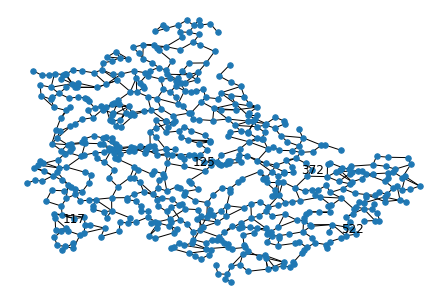

In [723]:
nx.draw(G,with_labels=False,pos=pos,node_size=30)
#nx.draw(G,nodelist=depot_locations,node_color='g',node_size=50,alpha=1)
nx.draw_networkx_labels(G,pos,{i:i for i in depot_locations});
#nx.draw_networkx_nodes(G,pos,nodelist=customer_location,node_color='r',node_size=100,alpha=1);

